# Script to read MEOP tag data from a given netCDF file

In [3]:
import meop
import matplotlib.pyplot as plt
import cmocean as cm

## Load data and metadata

In [4]:
# local filename
deployment = 'ct107'
smru_name = 'ct107-933-13'
qf = 'all'
namefile = smru_name+'_'+qf+'_prof.nc'
ds = meop.open_dataset(namefile)
ds

TypeError: Using a DataArray object to construct a variable is ambiguous, please extract the data using the .data property.

In [14]:
ds['LATITUDE'].round(4)

<xarray.DataArray 'LATITUDE' (N_PROF: 202)>
array([37.1927, 37.2279, 37.3049, 37.3046, 37.3153, 37.5778, 37.6955,
       37.8811, 37.9848, 38.1926, 38.317 , 38.4751, 38.5633, 38.8116,
       38.9966, 39.1041, 39.2192, 39.3354, 39.4499, 39.4734, 39.7585,
       39.8377, 40.0966, 40.1168, 40.2019, 40.3606, 40.4698, 40.8591,
       41.0573, 41.1706, 41.5062, 41.544 , 41.5808, 41.9122, 41.9686,
       41.9138, 42.0228, 42.2317, 42.3155, 42.4329, 42.4992, 42.4926,
       42.8001, 42.9585, 43.0085, 43.0767, 43.1969, 43.3502, 43.5672,
       43.7167, 43.7656, 43.8711, 44.1225, 44.23  , 44.4524, 44.6011,
       44.7057, 44.8998, 44.8941, 44.8517, 44.8685, 44.7317, 44.7787,
       44.8408, 44.8542, 44.9777, 45.2211, 45.2827, 45.3152, 45.4664,
       45.4796, 45.5421, 45.5231, 45.5355, 45.5587, 45.5903, 45.6387,
       45.7095, 45.7001, 45.7522, 45.766 , 45.7357, 45.731 , 45.7678,
       45.7921, 45.8646, 45.8612, 45.8366, 45.8362, 45.8716, 45.9168,
       45.9714, 46.0943, 46.1846, 46.1879, 46.3199, 46.4612, 46.4496,
       46.5777, 46.7454, 46.8326, 46.9183, 47.1156, 47.1563, 47.4894,
       47.5209, 47.4898, 47.3922, 47.2437, 47.1121, 46.9619, 46.8193,
       46.6245, 46.5673, 46.7465, 46.9233, 46.9378, 46.9686, 47.0955,
       47.2157, 47.3261, 47.4506, 47.47  , 47.7209, 47.6804, 47.5902,
       47.4723, 47.3154, 47.2793, 47.3646, 47.3904, 47.2251, 47.2552,
       47.2341, 47.322 , 47.3588, 47.124 , 47.102 , 47.0847, 46.9112,
       46.9583, 47.0029, 47.0365, 46.9884, 46.8349, 46.7693, 46.7179,
       46.5376, 46.6245, 46.5447, 46.4509, 46.4572, 46.34  , 46.1955,
       46.1223, 46.0414, 45.9046, 45.6987, 45.6181, 45.5417, 44.6985,
       44.6011, 44.4781, 44.1372, 44.065 , 43.9868, 43.8492, 43.1844,
       42.8776, 42.7283, 42.5976, 42.3736, 42.3267, 42.202 , 42.165 ,
       42.1103, 42.0795, 41.9126, 41.9034, 41.7992, 41.5168, 41.5045,
       41.2268, 40.9381, 40.8001, 40.4841, 40.4403, 40.3563, 40.2181,
       40.0561, 39.9682, 39.9095, 39.8727, 39.7773, 39.6623, 39.5732,
       39.3234, 39.0538, 38.7045, 38.4615, 38.0069, 37.875 ])
Coordinates:
  * N_PROF   (N_PROF) int64 0 1 2 3 4 5 6 7 ... 194 195 196 197 198 199 200 201

In [15]:
# If the file is given in the standard MEOP arborescence, the filename can be retrived with:
#import meop_filenames
#namefile = meop_filenames.fname_prof(smru_name,deployment,qf)

In [16]:
ds.list_metadata()

,DEPLOYMENT_CODE,SMRU_PLATFORM_CODE,CYCLE_NUMBER,JULD,LATITUDE,LONGITUDE,N_TEMP,N_PSAL,N_CHLA,year,month,day,MASK
0,ct107,ct107-933-13,1,2014-02-03 08:20:00,37.1927,-122.7000,16.0,16.0,NaN,2014,2,3,North Pacific
1,ct107,ct107-933-13,2,2014-02-03 19:10:00,37.2279,-123.1334,16.0,16.0,NaN,2014,2,3,North Pacific
2,ct107,ct107-933-13,3,2014-02-04 18:00:00,37.3049,-124.2976,16.0,16.0,NaN,2014,2,4,North Pacific
3,ct107,ct107-933-13,4,2014-02-05 03:10:00,37.3046,-124.6125,16.0,16.0,NaN,2014,2,5,North Pacific
4,ct107,ct107-933-13,5,2014-02-05 07:10:00,37.3153,-124.8834,8.0,8.0,NaN,2014,2,5,North Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,ct107,ct107-933-13,198,2014-04-18 16:19:59,39.0538,-123.7800,16.0,16.0,NaN,2014,4,18,North Pacific
198,ct107,ct107-933-13,199,2014-04-19 01:19:59,38.7045,-124.0344,16.0,16.0,NaN,2014,4,19,North Pacific
199,ct107,ct107-933-13,200,2014-04-19 07:19:59,38.4615,-123.8135,8.0,8.0,NaN,2014,4,19,North Pacific
200,ct107,ct107-933-13,201,2014-04-20 03:00:00,38.0069,-123.3001,16.0,16.0,NaN,2014,4,20,North Pacific


## Compute derived variables

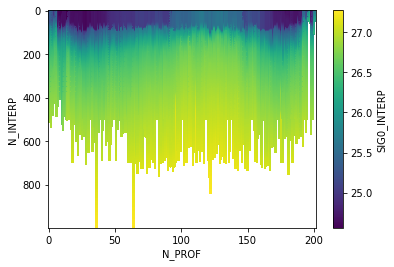

In [18]:
ds.add_sigma0('_INTERP').SIG0_INTERP.T.plot(yincrease=False)

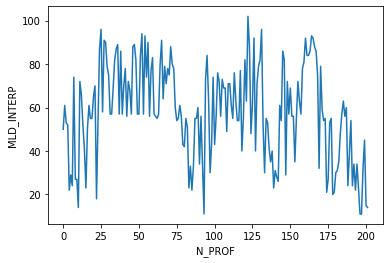

In [19]:
# compute MLD
ds.add_mld('_INTERP').MLD_INTERP.plot()

(200.0, 0.0)

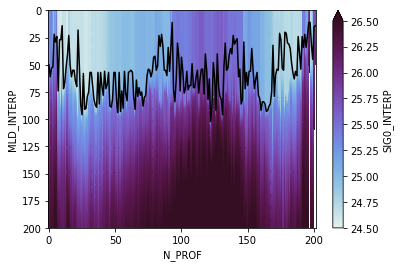

In [34]:
ds.add_sigma0('_INTERP').SIG0_INTERP.T.plot(yincrease=False,vmin=24.5,vmax=26.5,cmap=cm.cm.dense)
ds.add_mld('_INTERP').MLD_INTERP.plot(color='k')
plt.ylim([200,0])

## plot data summary

(<Figure size 864x648 with 5 Axes>,
 {'T': <matplotlib.axes._subplots.AxesSubplot at 0x7f6ebe933250>,
  'S': <matplotlib.axes._subplots.AxesSubplot at 0x7f6ebf34f410>,
  'D': <matplotlib.axes._subplots.AxesSubplot at 0x7f6ebf2d80d0>,
  'TS': <matplotlib.axes._subplots.AxesSubplot at 0x7f6ebf99b690>,
  'xy': <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f6ec0da1910>})

/opt/tljh/user/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/tljh/user/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


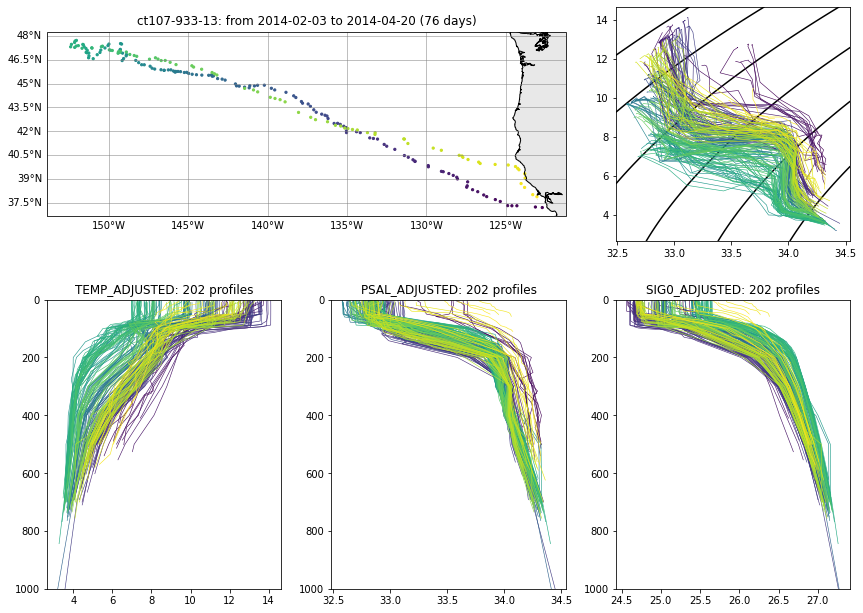

In [35]:
ds.plot_data_tags()

## Plot geographic map

(<Figure size 720x720 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f6ec8cf3310>)

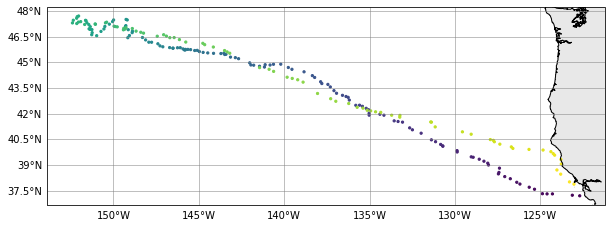

In [36]:
ds.plot_map()

# plot vertical profiles

(<Figure size 720x720 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ebf156910>,
       dtype=object))

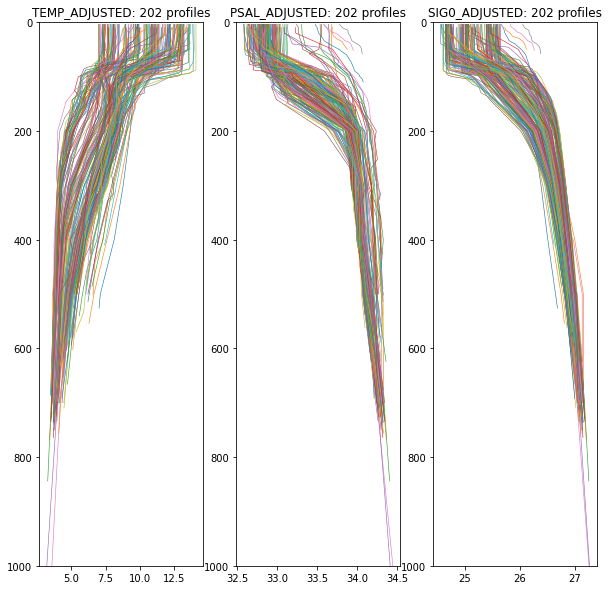

In [37]:
ds.plot_profiles(['TEMP','PSAL','SIG0'])

## plot TS profile

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ec1202550>)

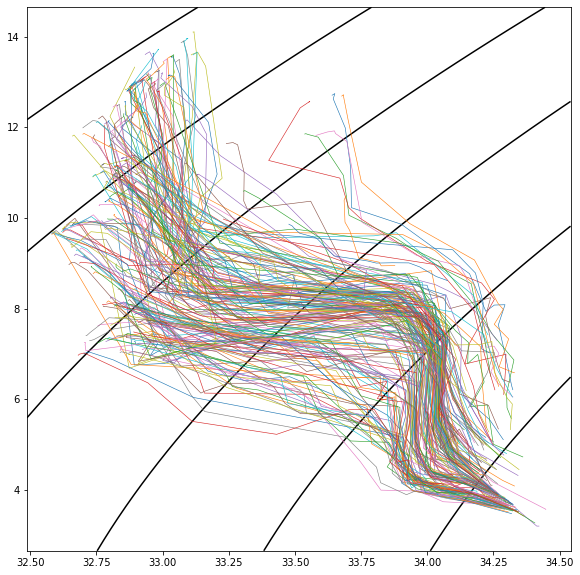

In [38]:
ds.plot_TSdiag()

# plot TS section

(<Figure size 720x720 with 6 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ec0c542d0>,
       dtype=object))

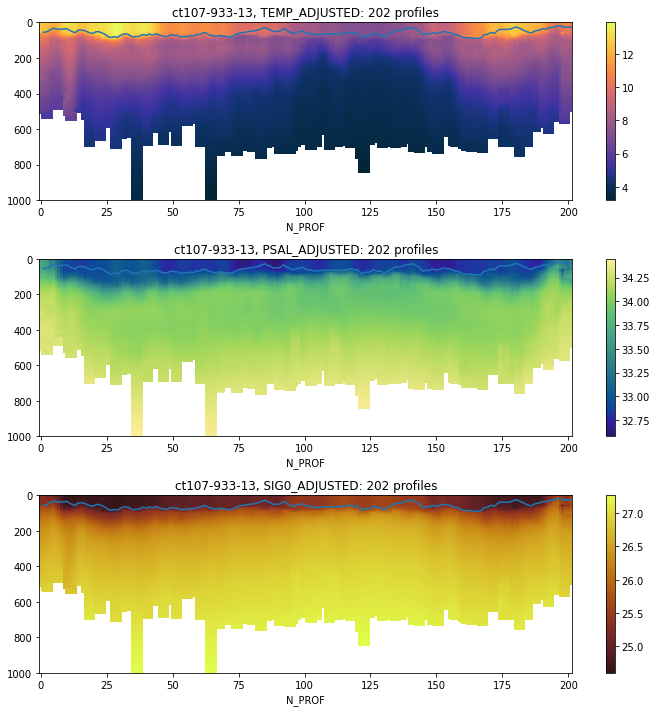

In [40]:
ds.plot_sections(['TEMP','PSAL','SIG0'],rolling=4,density_threshold=0.03)

# select a subset of profiles

(<Figure size 864x648 with 5 Axes>,
 {'T': <matplotlib.axes._subplots.AxesSubplot at 0x7fcd5d248150>,
  'S': <matplotlib.axes._subplots.AxesSubplot at 0x7fcd5d20a710>,
  'D': <matplotlib.axes._subplots.AxesSubplot at 0x7fcd5d1bfc50>,
  'TS': <matplotlib.axes._subplots.AxesSubplot at 0x7fcd5d180210>,
  'xy': <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7fcd5d136910>})

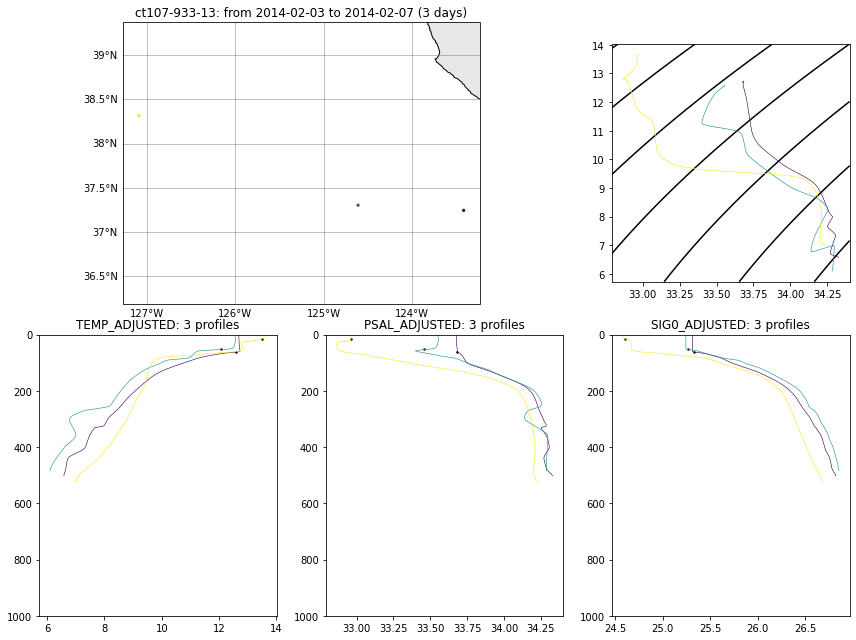

In [41]:
index_subset = [1,3,10]
ds.isel({'N_PROF':index_subset}).plot_data_tags()

(<Figure size 864x648 with 5 Axes>,
 {'T': <matplotlib.axes._subplots.AxesSubplot at 0x7fcd5cfba0d0>,
  'S': <matplotlib.axes._subplots.AxesSubplot at 0x7fcd5cc91090>,
  'D': <matplotlib.axes._subplots.AxesSubplot at 0x7fcd5ccc55d0>,
  'TS': <matplotlib.axes._subplots.AxesSubplot at 0x7fcd5cbf9b10>,
  'xy': <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7fcd5cbbd250>})

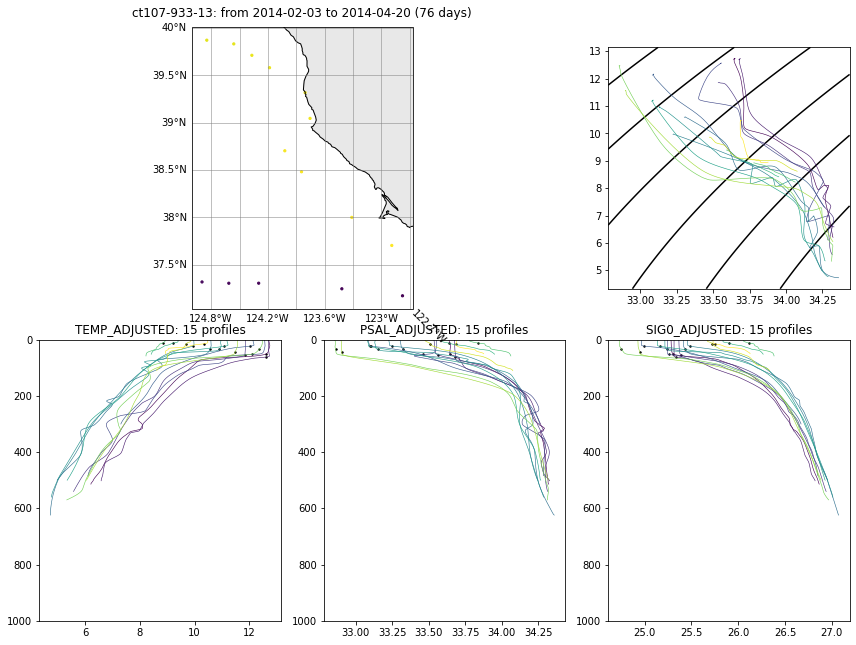

In [42]:
condition = ds.LONGITUDE>-125
ds.isel({'N_PROF':condition}).plot_data_tags()